In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno
import plotly.express as px 
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

# data import
main_df = pd.read_csv('./data/netflix_titles.csv')
print(main_df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


<AxesSubplot:>

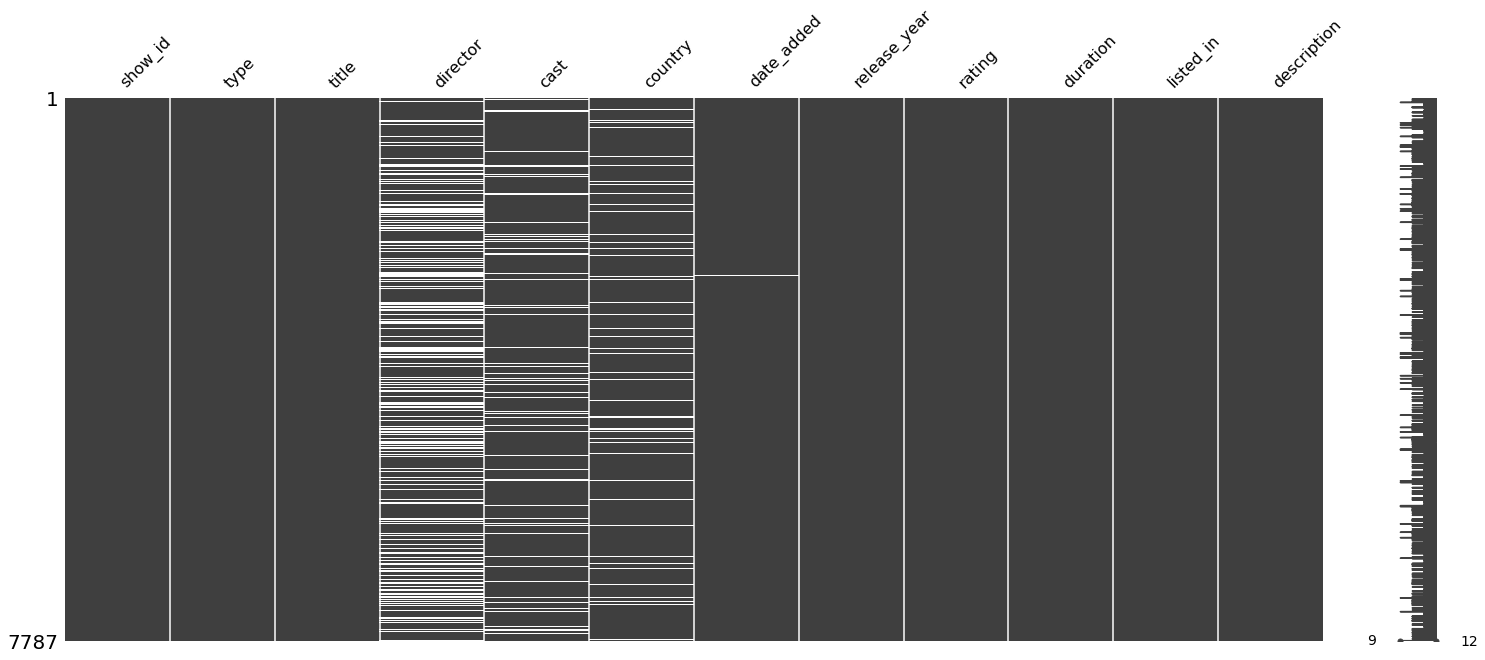

In [5]:
# 데이터 결측치 분포도 
msno.matrix(main_df)

<AxesSubplot:>

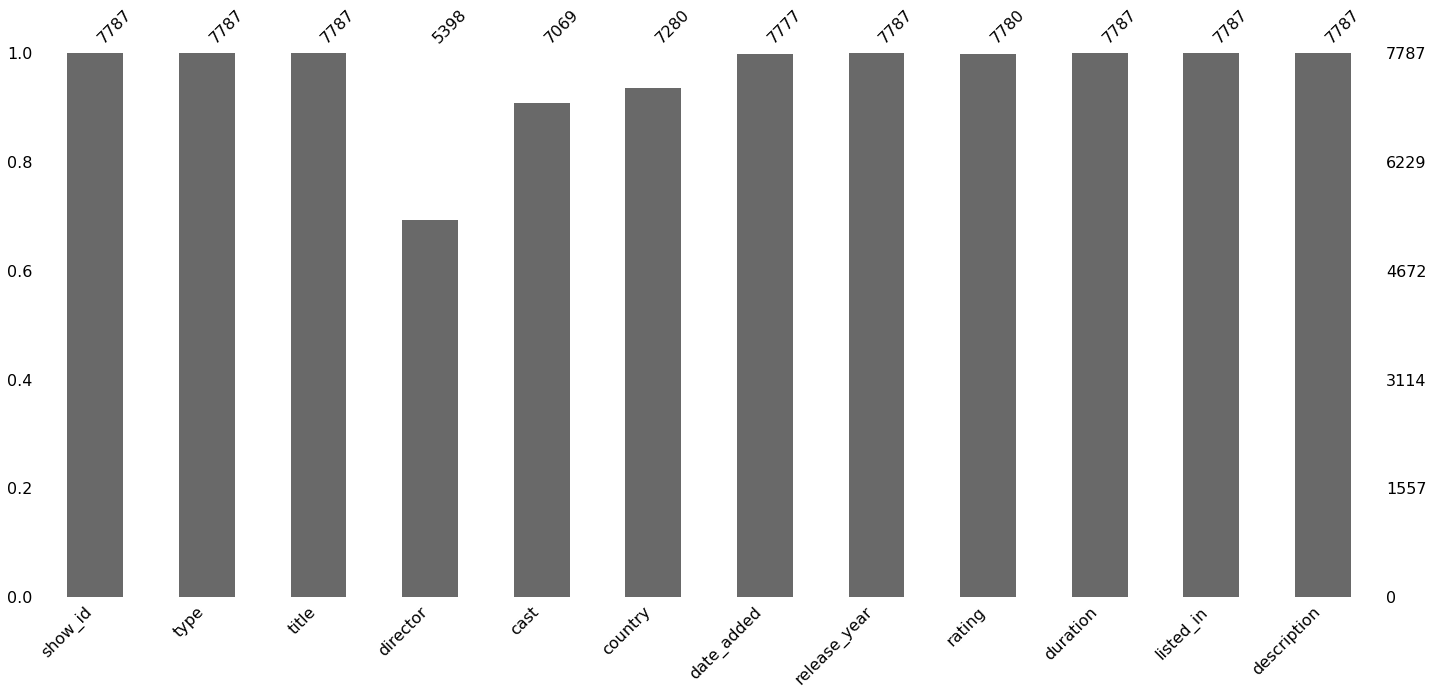

In [6]:
# 결측치 차트
msno.bar(main_df)

In [7]:
for i in main_df.columns:
    null_rate = main_df[i].isna().sum() / len(main_df) * 100
    if null_rate > 0:
        print('{}s null rate : {}%'.format(i, round(null_rate,2)))

directors null rate : 30.68%
casts null rate : 9.22%
countrys null rate : 6.51%
date_addeds null rate : 0.13%
ratings null rate : 0.09%


In [8]:
main_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [9]:
main_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## 결측치 보정

In [10]:
# rating 컬럼 보정
rating_replacements = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-NA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA'
}

for id, rate in rating_replacements.items():
    main_df.iloc[id, 8] = rate

main_df['rating'].isna().sum()

0

In [11]:
# 결측치가 많은 director cast column drop
main_df = main_df.drop(['director', 'cast'], axis=1)
main_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
main_df = main_df[main_df['date_added'].notna()]

In [13]:
main_df.isna().sum()

show_id           0
type              0
title             0
country         506
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [14]:
main_df['country'] = main_df['country'].fillna(main_df['country'].mode()[0])

In [15]:
main_df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## 데이터 컬럼 추가

In [17]:
# year_added 컬럼 추가 하기
main_df['year_added'] = main_df['date_added'].apply(lambda x: x.split(" ")[-1])

# month_added 컬럼 추가 하기
main_df['month_added'] = main_df['date_added'].apply(lambda x: x.split(' ')[0])

main_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January


In [18]:
ratings_ages = { 
    'TV-PG': 'Older Kids', 
    'TV-MA': 'Adults', 
    'TV-Y7-FV': 'Older Kids', 
    'TV-Y7': 'Older Kids', 
    'TV-14': 'Teens', 
    'R': 'Adults', 
    'TV-Y': 'Kids', 
    'NR': 'Adults', 
    'PG-13': 'Teens', 
    'TV-G': 'Kids', 
    'PG': 'Older Kids', 
    'G': 'Kids', 
    'UR': 'Adults', 
    'NC-17': 'Adults' 
} 
main_df['target_ages'] = main_df['rating'].replace(ratings_ages) 
main_df['target_ages'].unique()


array(['Adults', 'Teens', 'Older Kids', 'Kids', 'TV-NA'], dtype=object)

## 데이터 타입 변경하기

In [19]:
# type 컬럼은 category로 변경
main_df['type'] = pd.Categorical(main_df['type'])

# target_ages 컬럼도 category 로 변경
main_df['target_ages'] = pd.Categorical(main_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year_added 는 integer로 변경 합니다. 그래야 released_year 데이터와 비교 할 수 있음
main_df['year_added'] = pd.to_numeric(main_df['year_added'])

main_df.dtypes

show_id           object
type            category
title             object
country           object
date_added        object
release_year       int64
rating            object
duration          object
listed_in         object
description       object
year_added         int64
month_added       object
target_ages     category
dtype: object

## EDA

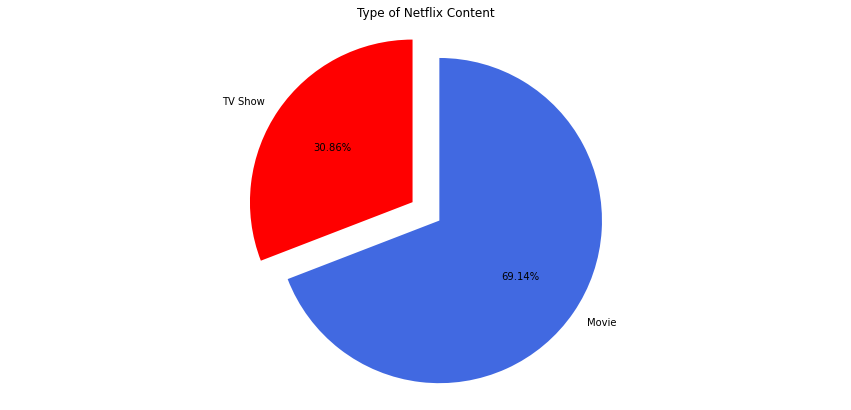

In [20]:
plt.figure(figsize=(15, 7))
labels = ['TV Show', 'Movie']
plt.pie(main_df['type'].value_counts().sort_values(), labels=labels, explode=[0.1, 0.1], autopct='%1.2f%%', colors=['red', 'royalblue'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

In [21]:
df_tv = main_df[main_df['type'] == 'TV Show']
df_movies = main_df[main_df['type'] == 'Movie']

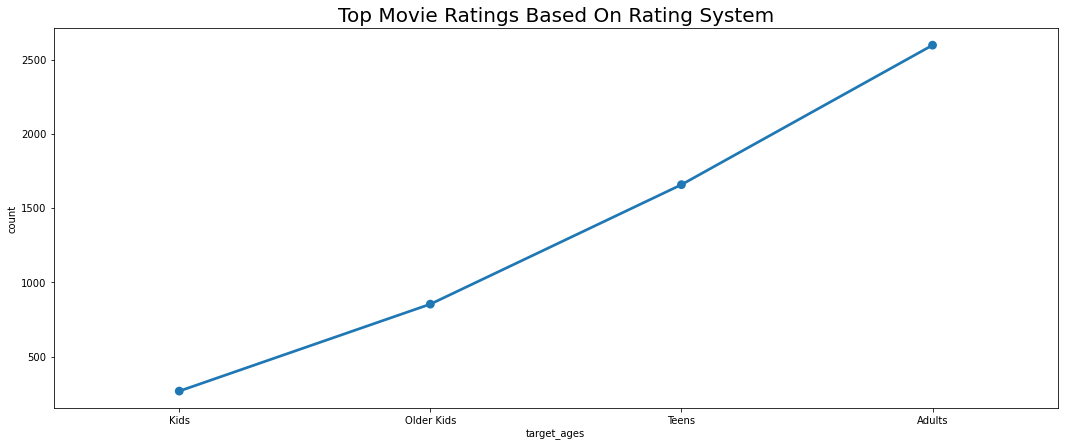

In [22]:
movie_ratings = df_movies.groupby(['target_ages'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)
fig_dims = (18, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='target_ages', y='count', data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System', size='20')
plt.show()

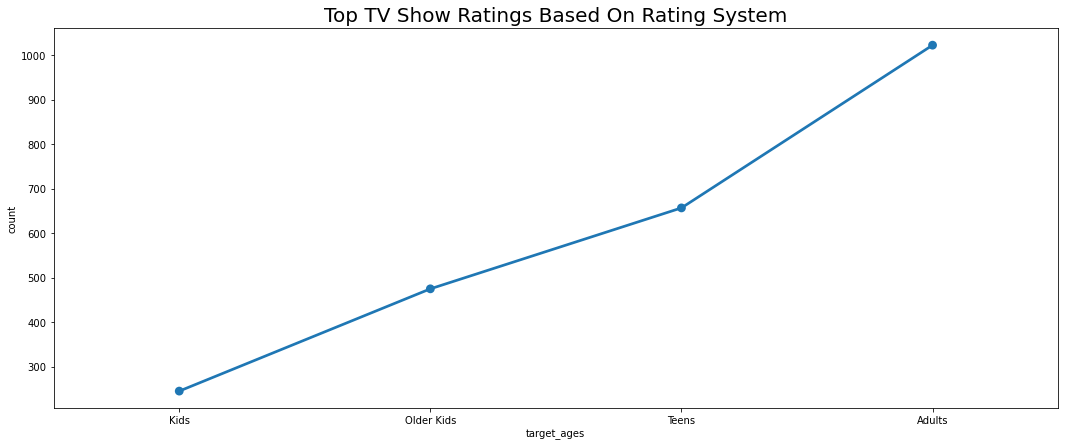

In [23]:
tv_ratings = df_tv.groupby(['target_ages'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False) 
fig_dims = (18,7) 
fig, ax = plt.subplots(figsize=fig_dims) 
sns.pointplot(x='target_ages',y='count',data=tv_ratings) 
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()


In [24]:
def generate_rating_df(main_df):
    rating_df = main_df.groupby(['rating', 'target_ages']).agg({'show_id' : 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0 ]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

rating_df = generate_rating_df(main_df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', title='Ratings of Movies And TV Shows Based On Target Age Groups', labels={'counts': 'COUNT', 'rating':'RATINGS', 'target_ages': 'TARGET AGE GROUPS'})
fig.show()

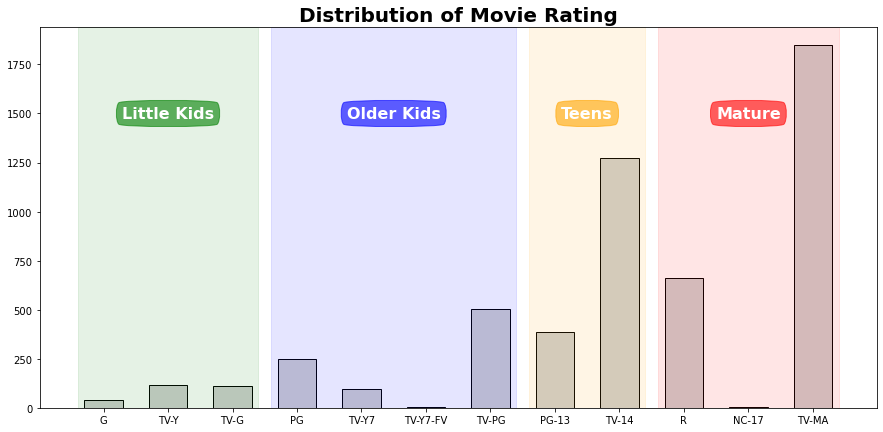

In [25]:
rating_order_movie = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv = ['TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1, 1, figsize=(15, 7))
    if h_lim:
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data, color='#d0d0d0', width=0.6, edgecolor='black')

    color = ['green', 'blue', 'orange', 'red']
    span_range = [[0, 2], [3, 6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2, height),
                    xytext=(0, 0), textcoords='offset points',
                    va='center', ha='center',
                    color='w', fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
                    
        ax.axvspan(span_range[idx][0]-0.4, span_range[idx][1]+0.4, color=color[idx], alpha=0.1)
    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

rating_barplot(movie_rating, 'Movie', 1500)

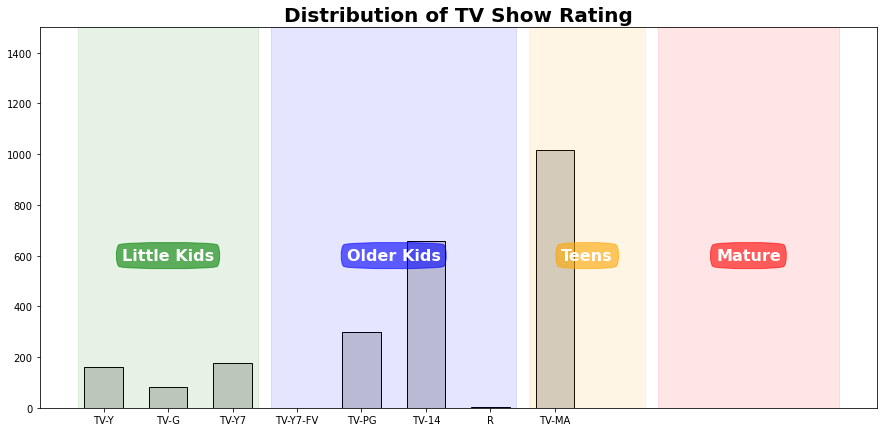

In [26]:
rating_barplot(tv_rating, 'TV Show', 600, 1500)

## 년도별 컨텐츠 등록 수 시각화

In [30]:
df_content = main_df['year_added'].value_counts().reset_index().rename(columns={'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))

df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns={'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x: 100*x/sum(df_tv1['count']))

df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns={'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x: 100*x/sum(df_movies1['count']))

t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1['count'], name='Movies', marker=dict(color='royalblue'))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1['count'], name='TV Shows', marker=dict(color='red'))
t3 = go.Scatter(x=df_content['year_added'], y=df_content['count'], name='Total Contents', marker=dict(color='black'))

data = [t1, t2, t3]

layout = go.Layout(title='Content added over the years', legend=dict(x=0.1, y=1.1, orientation='h'))
fig = go.Figure(data, layout=layout)
fig.show()

## 영화 재생시간 데이터 시각화

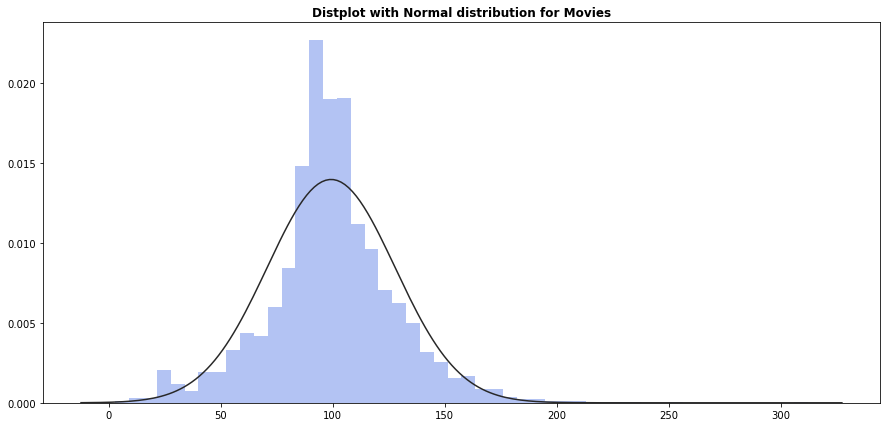

In [31]:
from scipy.stats import norm

plt.figure(figsize=(15, 7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'), fit=norm, kde=False, color=['royalblue'])
plt.title('Distplot with Normal distribution for Movies', fontweight='bold')
plt.show()

## TV Shows 와 Movies의 10대 장르

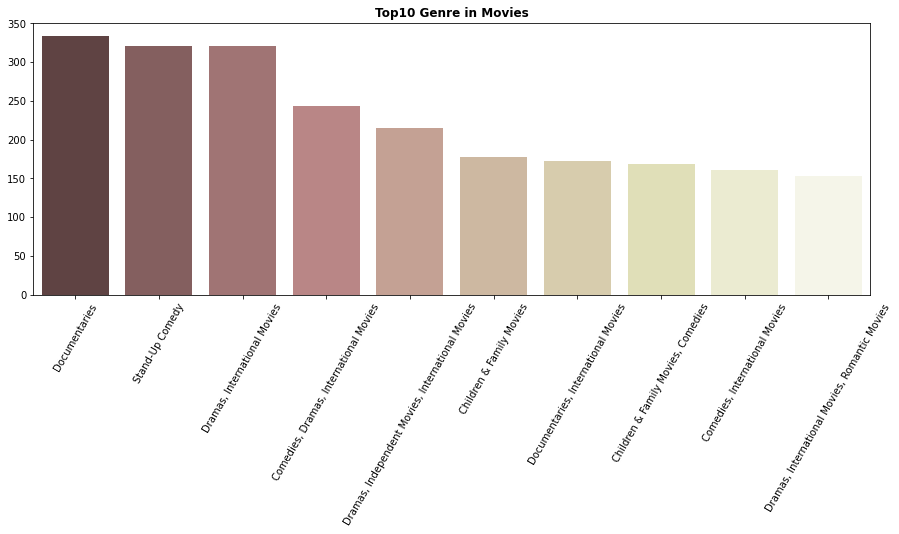

In [32]:
plt.figure(figsize=(15, 5))
sns.barplot(x = df_movies['listed_in'].value_counts().head(10).index,
            y = df_movies['listed_in'].value_counts().head(10).values, palette='pink')
plt.xticks(rotation=60)
plt.title('Top10 Genre in Movies', fontweight='bold')
plt.show()

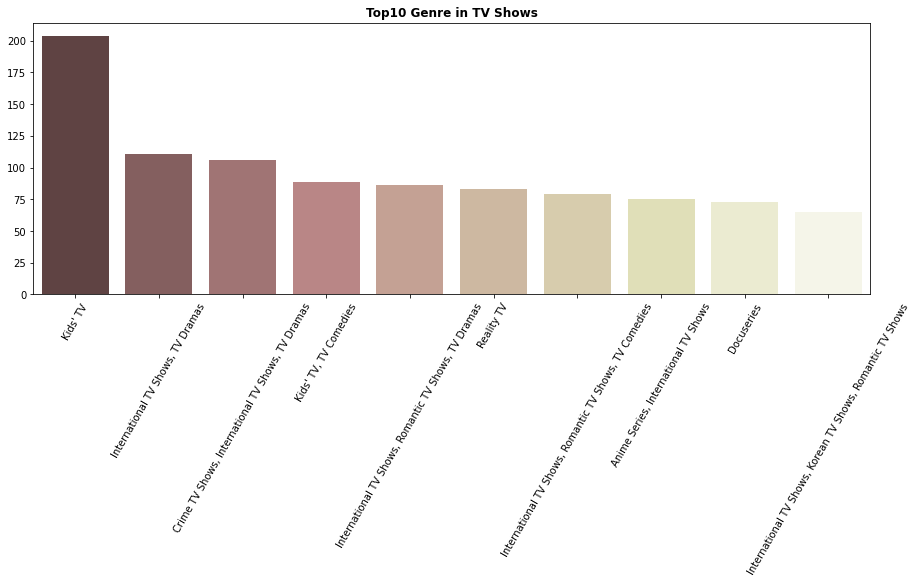

In [33]:
plt.figure(figsize=(15, 5))
sns.barplot(x = df_tv['listed_in'].value_counts().head(10).index,
            y = df_tv['listed_in'].value_counts().head(10).values, palette='pink')
plt.xticks(rotation=60)
plt.title('Top10 Genre in TV Shows', fontweight='bold')
plt.show()

## 넷플릭스 제작 10대 국가

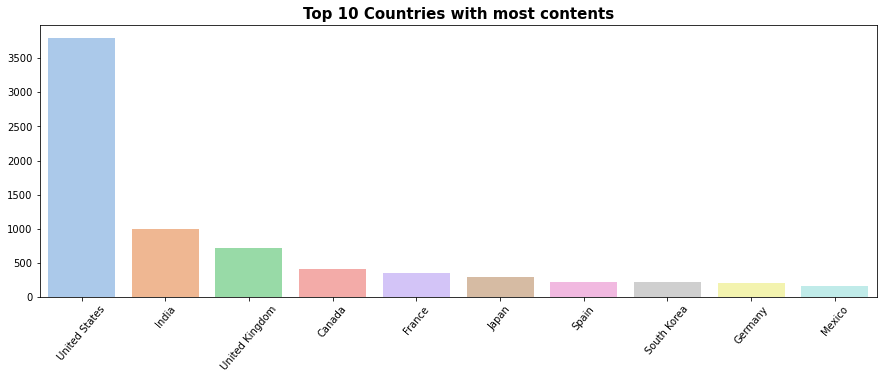

In [34]:
from collections import Counter

country_data = main_df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,', ',').replace(', ', ',').split(',')))).sort_values(ascending=False)
top20country = country_count.head(10)

plt.figure(figsize=(15, 5))
sns.barplot(x=top20country.index, y=top20country, palette='pastel')
plt.xticks(rotation=50)
plt.title('Top 10 Countries with most contents', fontsize=15, fontweight='bold')
plt.show()

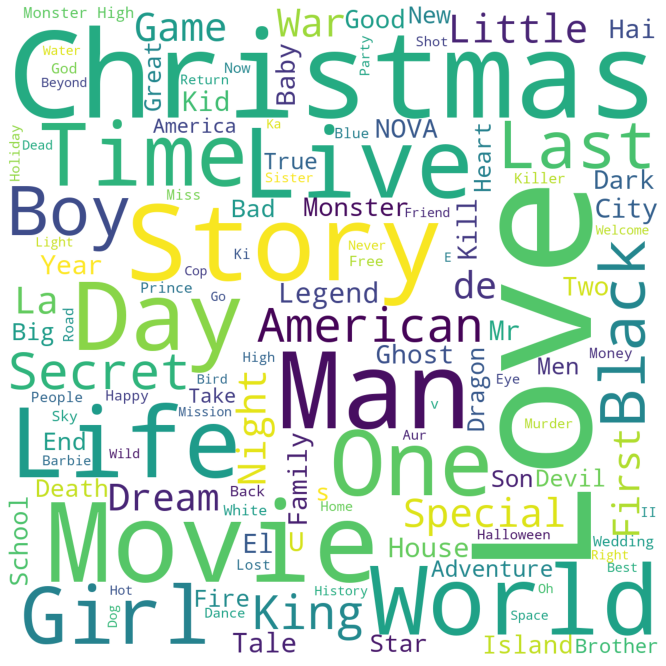

In [35]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['title'])
plt.rcParams['figure.figsize'] = (12, 12)
wordcloud = WordCloud(background_color='white', width=1200, height=1200, max_words=121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

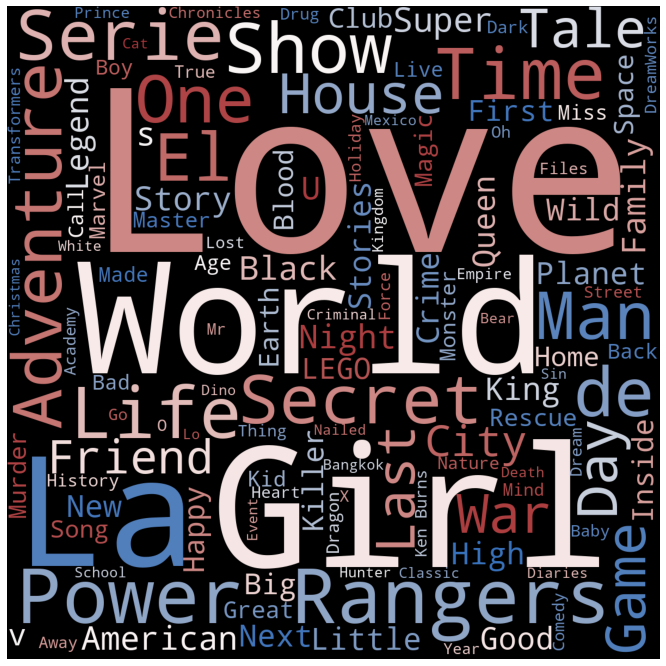

In [37]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['title'])
plt.rcParams['figure.figsize'] = (12, 12)
wordcloud = WordCloud(background_color='black', colormap='vlag', width=1200, height=1200, max_words=121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()